#**About Dataset**
The **Diamond Price Prediction** dataset is a comprehensive collection of information designed to predict the price of diamonds based on various key features. This dataset includes essential attributes that contribute to a diamond's value, providing a multifaceted view of the factors influencing its price. The primary variables in this dataset are:

- **Carat**: The weight of the diamond, one of the most crucial determinants of price.
- **Cut**: A qualitative measure of a diamond's craftsmanship, including categories such as 'Fair', 'Good', 'Very Good', 'Premium', and 'Ideal'.
- **Color**: A grading of the diamond's color, ranging from 'D' (colorless) to 'J' (slightly colored).
- **Clarity**: A measure of the diamond's internal and external flaws, with grades ranging from 'I1' (inclusions) to 'IF' (flawless).
- **Depth**: The total depth percentage of the diamond, calculated as the z dimension divided by the average of x and y dimensions.
- **Table**: The width of the diamond's top facet, relative to its width, impacting its brilliance.
- **X (Length)**, **Y (Width)**, **Z (Depth)**: The physical dimensions of the diamond in millimeters, directly affecting the overall size and hence, the price.

This dataset serves as a valuable resource for developing predictive models that can estimate diamond prices with high accuracy, based on these intrinsic and extrinsic features. It is ideal for machine learning practitioners, data scientists, and economists looking to understand the diamond market or build sophisticated pricing algorithms.

In [376]:
import warnings
warnings.filterwarnings('ignore')

#**Importing Libraries and Dataset**

In [377]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',None)

df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#**Descibing the dataset**

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [379]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#**Preprocessing as per requirement**

##**Visualizing the outliers in dataset**

<Axes: ylabel='carat'>

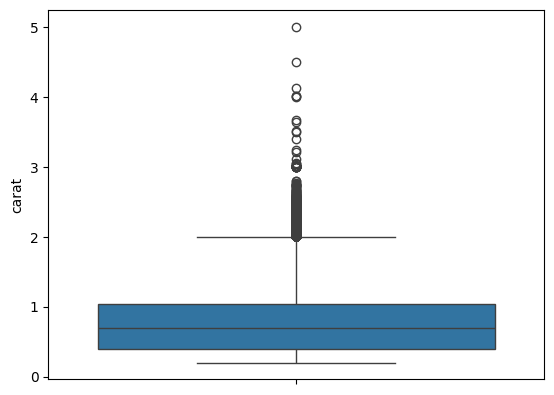

In [380]:
import seaborn as sns
sns.boxplot(df['carat'])

In [381]:
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df = df[(df['carat'] >= min) & (df['carat'] <= max)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: ylabel='carat'>

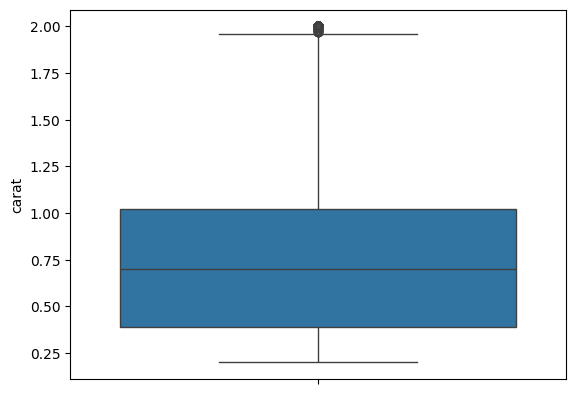

In [382]:
sns.boxplot(df['carat'])

<Axes: ylabel='depth'>

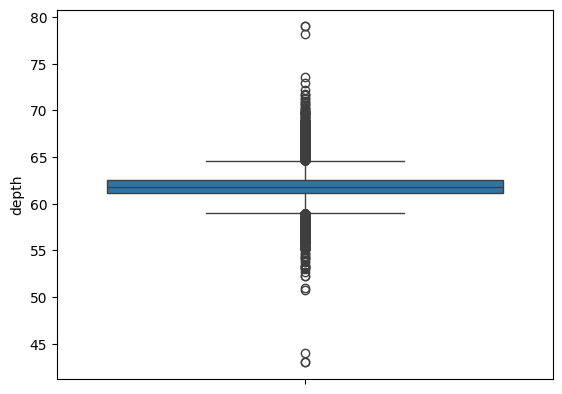

In [383]:
sns.boxplot(df['depth'])

In [384]:
q1 = df['depth'].quantile(0.25)
q3 = df['depth'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df = df[(df['depth'] >= min) & (df['depth'] <= max)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: ylabel='depth'>

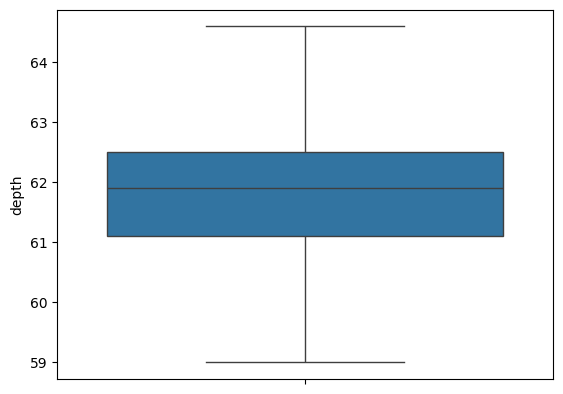

In [385]:
sns.boxplot(df['depth'])

<Axes: ylabel='table'>

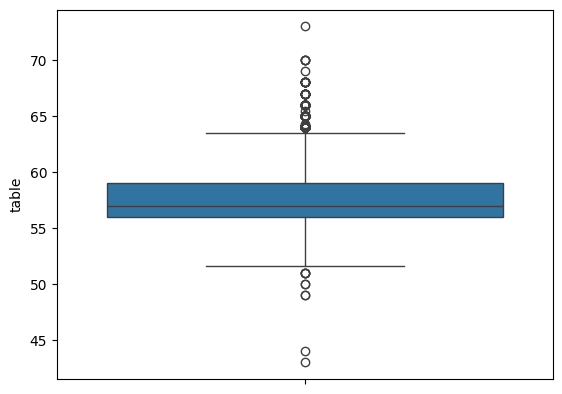

In [386]:
sns.boxplot(df['table'])

In [387]:
q1 = df['table'].quantile(0.25)
q3 = df['table'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df = df[(df['table'] >= min) & (df['table'] <= max)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: ylabel='table'>

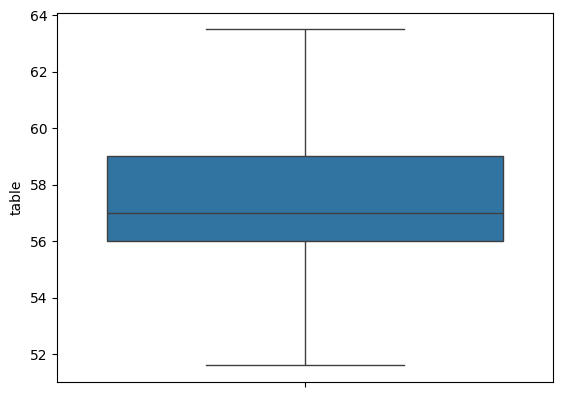

In [388]:
sns.boxplot(df['table'])

<Axes: ylabel='price'>

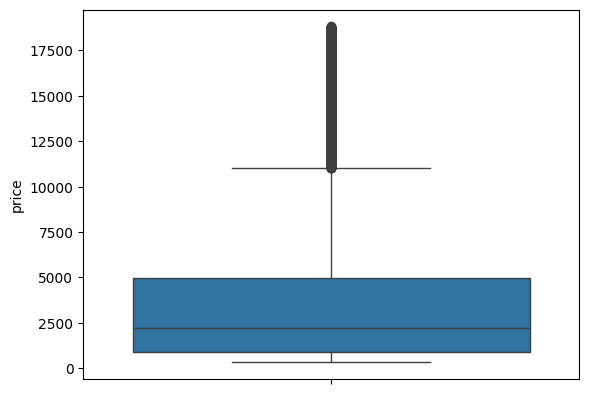

In [389]:
sns.boxplot(df['price'])

In [390]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df = df[(df['price'] >= min) & (df['price'] <= max)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: ylabel='price'>

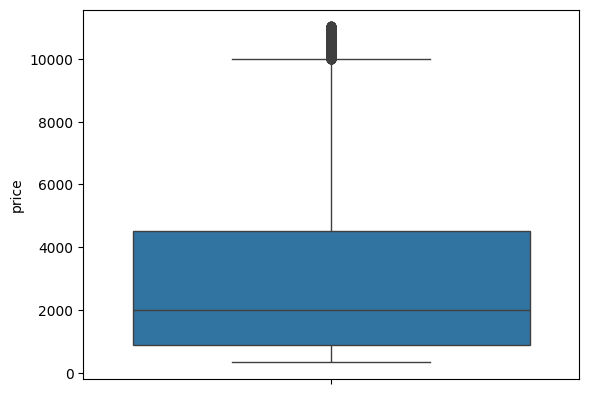

In [391]:
sns.boxplot(df['price'])

<Axes: ylabel='x'>

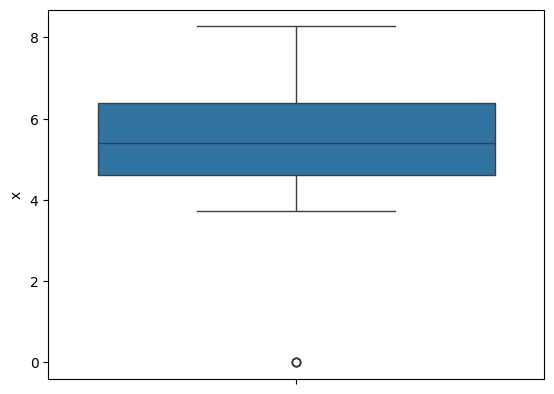

In [392]:
sns.boxplot(df['x'])

In [393]:
q1 = df['x'].quantile(0.25)
q3 = df['x'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df = df[(df['x'] >= min) & (df['x'] <= max)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: ylabel='x'>

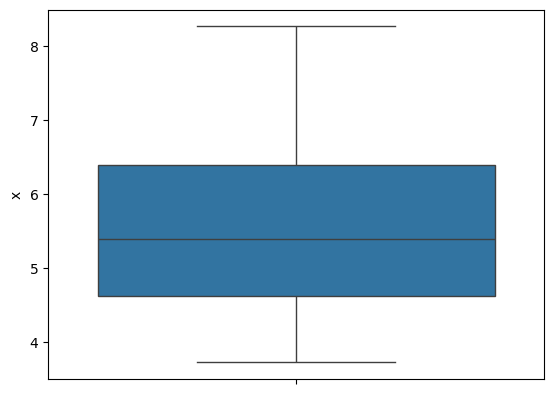

In [394]:
sns.boxplot(df['x'])

<Axes: ylabel='y'>

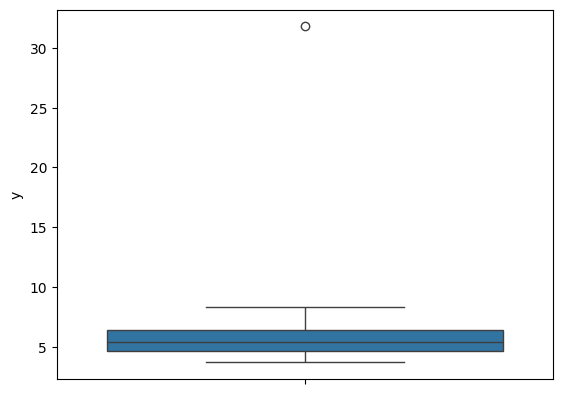

In [395]:
sns.boxplot(df['y'])

In [396]:
q1 = df['y'].quantile(0.25)
q3 = df['y'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df = df[(df['y'] >= min) & (df['y'] <= max)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: ylabel='y'>

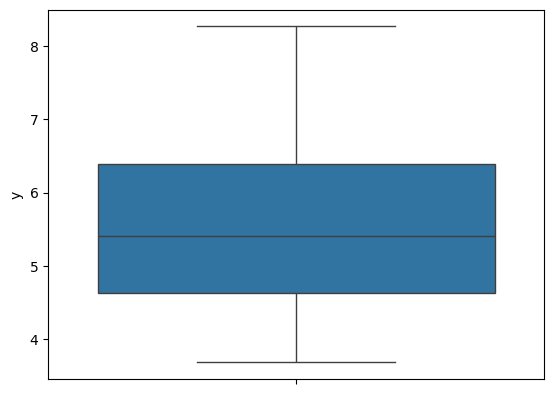

In [397]:
sns.boxplot(df['y'])

<Axes: ylabel='z'>

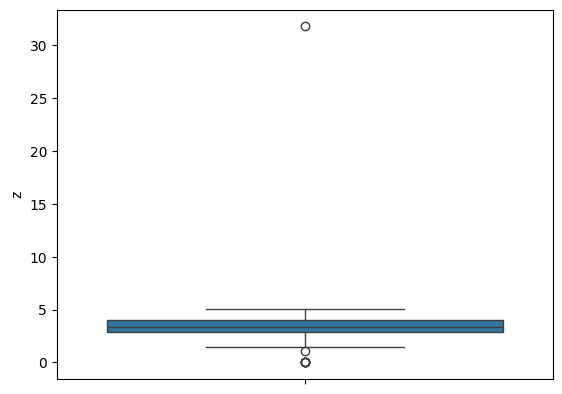

In [398]:
sns.boxplot(df['z'])

In [399]:
q1 = df['z'].quantile(0.25)
q3 = df['z'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df = df[(df['z'] >= min) & (df['z'] <= max)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: ylabel='z'>

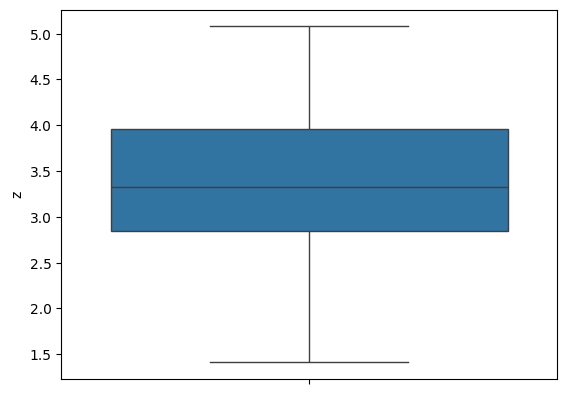

In [400]:
sns.boxplot(df['z'])

In [401]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##**Visualizing the missing values in dataset (if any)**

<Axes: >

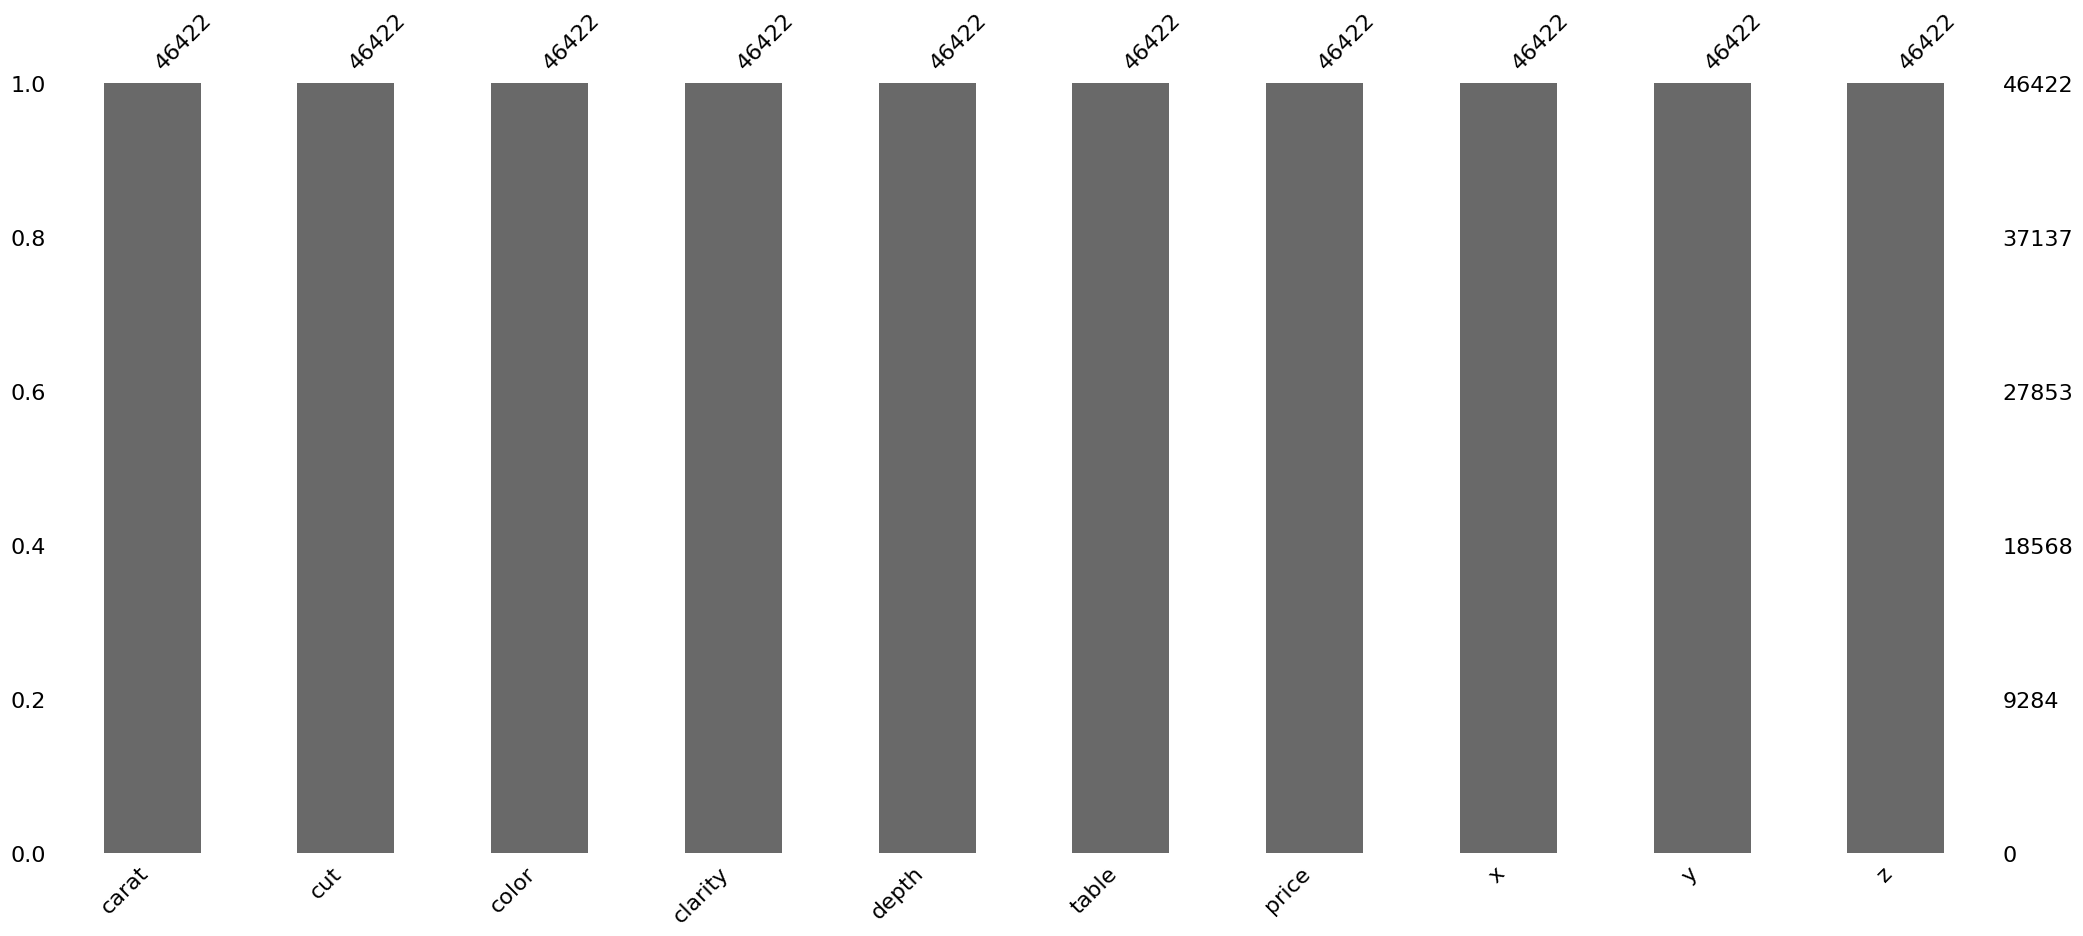

In [419]:
import missingno as msno
msno.bar(df)

In [402]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


##**Checking for duplicate values**

In [403]:
df.duplicated().sum()

110

In [404]:
df.drop_duplicates(inplace=True)

In [405]:
df.duplicated().sum()

0

In [406]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##**Encoding the categorical variables**

In [407]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

The order of diamond cuts from highest to lowest quality, which generally correlates with price, is as follows:

1. **Ideal**
2. **Premium**
3. **Very Good**
4. **Good**
5. **Fair**

In diamond price prediction, an "Ideal" cut typically fetches the highest price, followed by "Premium," and so on, with "Fair" generally being the least expensive among these categories.

In [408]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']],
                    dtype=np.int64)
df['cut'] = oe.fit_transform(df[['cut']])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [409]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

The order of diamond color grading from highest to lowest quality, which typically affects pricing, is as follows:

1. **D** (Colorless)
2. **E** (Colorless)
3. **F** (Colorless)
4. **G** (Near Colorless)
5. **H** (Near Colorless)
6. **I** (Near Colorless)
7. **J** (Near Colorless)

In diamond price prediction, diamonds with a "D" color grade (completely colorless) are generally the most valuable, while those with a "J" grade have a slight yellow or brown tint and are usually less expensive.

In [410]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['J', 'I', 'H', 'G', 'F', 'E', 'D']],
                    dtype=np.int64)
df['color'] = oe.fit_transform(df[['color']])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [411]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

The order of diamond clarity grades from highest to lowest quality, which typically influences price, is as follows:

1. **IF** (Internally Flawless)
2. **VVS1** (Very, Very Slightly Included 1)
3. **VVS2** (Very, Very Slightly Included 2)
4. **VS1** (Very Slightly Included 1)
5. **VS2** (Very Slightly Included 2)
6. **SI1** (Slightly Included 1)
7. **SI2** (Slightly Included 2)
8. **I1** (Included 1)

In diamond price prediction, a "Flawless" (FL) diamond, with no internal or external imperfections, commands the highest price, while diamonds in the "Included" (I1) category, which have noticeable inclusions, are generally less expensive.

In [412]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']],
                    dtype=np.int64)
df['clarity'] = oe.fit_transform(df[['clarity']])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


#**Preprocessed Dataset**

In [413]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


#**Defining target variable(y) and feature variable(x)**

In [414]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [415]:
y = df['price']
x = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']]

#**Exploratory Data Analysis (EDA)**

In [416]:
import statsmodels.api as sm
x = sm.add_constant(x)

In [417]:
model=sm.OLS(y,x).fit()

In [418]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 5.535e+04
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        06:43:24   Log-Likelihood:            -3.7373e+05
No. Observations:               46422   AIC:                         7.475e+05
Df Residuals:                   46412   BIC:                         7.476e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -902.9908    587.408     -1.537      0.1

#**Train-Test Split**

In [420]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.7, random_state=2529 )

#**Model Selection**

In [421]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#**Training the model**

In [422]:
lr.fit(x_train,y_train)

LinearRegression()

#**Testing the model**

In [423]:
y_pred = lr.predict(x_test)

#**Calculating the metrics**

In [426]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test,y_pred)

0.9149335654404785

In [427]:
mean_squared_error(y_test,y_pred)

576468.6698683824

In [428]:
mean_absolute_error(y_test,y_pred)

530.4076927425033

#**Conclusion** - Though this model is the best model with 91.49% R2 score. But we can make it more perfect by adding some more feature varibles.